<a href="https://colab.research.google.com/github/alirezash97/Computer-Vision/blob/main/ImageEnhancement/Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Image:


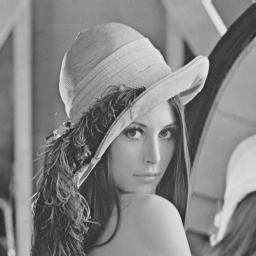

Histogram:


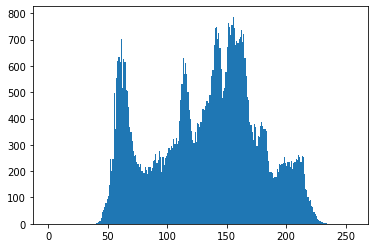

In [32]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


image = cv2.imread('/content/Lenna.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))
print('Original Image:')
cv2_imshow(image)
print("Histogram:")
plt.hist(image.ravel(), 256, [0,256])
plt.show()

Cumulative Values: 


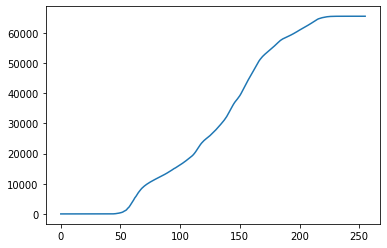

In [33]:
import numpy as np 


# cumulative histogram 
hist = cv2.calcHist([image],[0],None,[256],[0,256])
cumulative_hist = np.zeros((256, ))
for i in range(len(hist)):
  cumulative_hist[i] = np.sum(hist[:i])
print("Cumulative Values: ")
plt.plot(cumulative_hist)
plt.show()

Equalized Image:


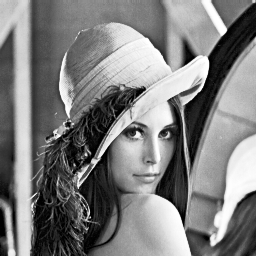

Histogram:


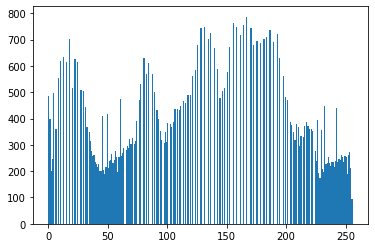

In [43]:
mxn = image.shape[0] * image.shape[1]
g = 256
n_p = int(mxn/g)

Equalized_image = np.zeros_like(image)
for row in range(image.shape[0]):
  for column in range(image.shape[1]):
    j = image[row, column] 
    CHj = cumulative_hist[j]
    i = max(0, (round(CHj/n_p)-1) )
    Equalized_image[row, column] = i

print('Equalized Image:')
cv2_imshow(Equalized_image)
print("Histogram:")
plt.hist(Equalized_image.ravel(), 256, [0,256])
plt.show()  
